# CSCI 2000U - Scientific Data Analysis


## Introduction

## Description of Data

## Analysis of Data

### The Dataset
**Suicide Rates Overview 1985 to 2016**

*Source: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016*

This dataset contains the suicide rates of all the countries from 1985 to 2016.


- country - Country in which data is from
- year - The year in which the data is collected from
- sex - Sex of the individual
- age - Age of the individual (in age groups)
- suicides_no - Number of suicides
- population - Population of each country in 'country'
- suicides/100k pop - Suicide rates per 100k of population
- HDI for year - Human Develop Index of each year
- gdp_for_year (\\$) - Gross Domestic Product of each year
- gdp_per_capita (\\$) - Ratio between the country’s GDP and its population
- generation - Generation that the individual is a part of


In [941]:
#importing used libraries
import csv
import re
import pandas as pd
from pandas.api.types import CategoricalDtype
from functools import reduce
import numpy as np
import calendar
import datetime
import string
import matplotlib.pyplot as plt


import sys
!{sys.executable} -m pip install seaborn
import seaborn as sns


# reading the dataset from csv file using pandas
data = pd.read_csv("master.csv")
    

### Getting to know the data

Displaying the first 5 records

In [942]:
data.head(5)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [943]:
data.shape

(27820, 12)

As seen above, this dataset has 27820 records with 12 attributes.


<br>
<br>
Basic numeric summary of the dataset attributes:

In [944]:
data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [945]:

print("The dataset has data from the year", data['year'].sort_index(ascending=True)[0], "to", data['year'].sort_index(ascending=True).values[-1]) 

The dataset has data from the year 1987 to 2014


In [946]:
print("There are", data['country'].nunique(), "unique countries represented in this dataset.")

There are 101 unique countries represented in this dataset.


In [947]:
print("There are", data['age'].nunique(), "unique age groups represented in this dataset. They are", np.unique(data['age'].values))

There are 6 unique age groups represented in this dataset. They are ['15-24 years' '25-34 years' '35-54 years' '5-14 years' '55-74 years'
 '75+ years']


In [948]:
print("There are", data['generation'].nunique(), "unique generations represented in this dataset. They are", np.unique(data['generation'].values))

There are 6 unique generations represented in this dataset. They are ['Boomers' 'G.I. Generation' 'Generation X' 'Generation Z' 'Millenials'
 'Silent']


### Cleaning the Dataset

***Tasks***
1) Rename columns
<br>
2) Filter out countries and year(s) with 0 data
<br>
3) Reorder age groups in chronological order
<br>
4) Remove country-year (not needed/redundant)
<br> 
5) Remove HDI for year (too much missing data to use)
<br>
6) Fix names of countries to match other dataset (add continents)

***Renaming columns***

In [949]:
data = data.rename(columns={'country':'Country','year':'Year','sex':'Gender','age':'Age',
                          'suicides_no':'Suicide No.','population':'Population','suicides/100k pop':'Suicides/100k Pop',
                          'country-year':'CountryYear','HDI for year':'HDI For Year',' gdp_for_year ($) ':'GDP For Year',
                          'gdp_per_capita ($)':'GDP Per Capita','generation':'Generation'})
data.head(5)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,CountryYear,HDI For Year,GDP For Year,GDP Per Capita,Generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


***Filtering out countries/years with no data*** <br>
Bahamas, Dominica, Saint Kitts and Nevis, Saint Vincent and Grenadines were removed because of the lack of data. Any data from 2016 was also removed.

In [950]:
data.drop(data[data.Country == 'Bahamas'].index, inplace = True)
data.drop(data[data.Country == 'Dominica'].index, inplace = True)
data.drop(data[data.Country == 'Saint Kitts and Nevis'].index, inplace = True)
data.drop(data[data.Country == 'Saint Vincent and Grenadines'].index, inplace = True)
data.drop(data[data.Year == '2016'].index, inplace = True)

***Reordering age groups in chronological order:***

In [951]:
age_order = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
data["Age"] = pd.Categorical(data["Age"], categories=age_order) 
data.sort_values(by = ['Country', 'Year', 'Gender', 'Age'], inplace = True)
data.head(10)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,CountryYear,HDI For Year,GDP For Year,GDP Per Capita,Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
10,Albania,1987,female,55-74 years,0,144600,0.00,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
11,Albania,1987,male,5-14 years,0,338200,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [952]:
data.isnull().sum()

Country                  0
Year                     0
Gender                   0
Age                      0
Suicide No.              0
Population               0
Suicides/100k Pop        0
CountryYear              0
HDI For Year         18988
GDP For Year             0
GDP Per Capita           0
Generation               0
dtype: int64

***Removing HDI For Year and CountryYear*** <br>
Since 'HDI For Year' is missing so much data, we decided to remove it. CountryYear is being removed because it is redundant.

In [953]:
data=data.drop(['HDI For Year','CountryYear'],axis=1)
data.head(5)

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,GDP For Year,GDP Per Capita,Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
7,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers
6,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent
10,Albania,1987,female,55-74 years,0,144600,0.00,"2,156,624,900",796,G.I. Generation


### Supplementary Dataset <br>
***country to continent***
<br> <br>
Source: https://www.kaggle.com/statchaitya/country-to-continent

This dataset contains information on countries, including the continent and sub-region it belongs to. <br>

- country - Country the data belongs to.
- code_2 - 2 letter country code
- code_3 - Alternative 3 letter country code
- country_code - Numeric country code
- iso_3166_2 - ISO 3166 Standard
- continent - Continent the country belongs to 
- sub_region - Subregion the country belongs o
- region_code - Numeric region code
- sub_region_code - Numeric subregion code

<br>
Let's take a look at the first 5 records.

In [954]:
continent = pd.read_csv("countryContinent.csv", encoding="ISO-8859-1")
continent.head()

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


In [955]:
continent = continent.rename(columns={'country':'Country','code_2': 'Code 2', 'code_3': 'Code 3', 'country_code': 'Country code',
                                      'iso_3166_2': 'ISO','continent':'Continent', 'sub_region':'Subregion', 
                                     'region_code':'Region code', 'sub_region_code': 'Subregion code'})
continent.head()

,Country,Code 2,Code 3,Country code,ISO,Continent,Subregion,Region code,Subregion code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0


We only need the country, continent and subregion so we can drop the rest of the columns

In [956]:
continent = continent.drop(['Code 2','Code 3', 'Country code', 'ISO', 'Region code', 'Subregion code'], axis = 1)
continent.head()

,Country,Continent,Subregion
0,Afghanistan,Asia,Southern Asia
1,Åland Islands,Europe,Northern Europe
2,Albania,Europe,Southern Europe
3,Algeria,Africa,Northern Africa
4,American Samoa,Oceania,Polynesia


***Fixing country names*** <br>
Need to fix country names to merge 2 datasets

In [957]:
data['Country'] = data['Country'].apply(lambda x: 'United States of America' if x == 'United States' else x)
continent['Country'] = continent['Country'].apply(lambda x: 'Republic of Korea' if x == 'Korea (Republic of)' else x)
continent['Country'] = continent['Country'].apply(lambda x: 'Democratic People\'s Republic of Korea' 
                                                  if x == 'Korea (Democratic People\'s Republic of)' else x)

Now we can merge the two datasets together:

In [958]:
df = pd.merge(data, continent, left_on=['Country'], right_on=['Country'])
df.head()

,Country,Year,Gender,Age,Suicide No.,Population,Suicides/100k Pop,GDP For Year,GDP Per Capita,Generation,Continent,Subregion
0,Albania,1987,female,5-14 years,0,311000,0.00,"2,156,624,900",796,Generation X,Europe,Southern Europe
1,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,Europe,Southern Europe
2,Albania,1987,female,25-34 years,4,257200,1.56,"2,156,624,900",796,Boomers,Europe,Southern Europe
3,Albania,1987,female,35-54 years,6,278800,2.15,"2,156,624,900",796,Silent,Europe,Southern Europe
4,Albania,1987,female,55-74 years,0,144600,0.00,"2,156,624,900",796,G.I. Generation,Europe,Southern Europe


Rearranging the order of columns for the newly merged dataframe:

In [959]:
df = df[['Year', 'Continent','Subregion','Country','Gender','Age', 'Suicide No.', 'Population', 'Suicides/100k Pop', 
         'Generation','GDP For Year','GDP Per Capita']]
df.head()

,Year,Continent,Subregion,Country,Gender,Age,Suicide No.,Population,Suicides/100k Pop,Generation,GDP For Year,GDP Per Capita
0,1987,Europe,Southern Europe,Albania,female,5-14 years,0,311000,0.00,Generation X,"2,156,624,900",796
1,1987,Europe,Southern Europe,Albania,female,15-24 years,14,289700,4.83,Generation X,"2,156,624,900",796
2,1987,Europe,Southern Europe,Albania,female,25-34 years,4,257200,1.56,Boomers,"2,156,624,900",796
3,1987,Europe,Southern Europe,Albania,female,35-54 years,6,278800,2.15,Silent,"2,156,624,900",796
4,1987,Europe,Southern Europe,Albania,female,55-74 years,0,144600,0.00,G.I. Generation,"2,156,624,900",796


## Exploratory Data Analysis

**Worldwide**

First, we'll look at the worldwide suicide rate by gender through all years:

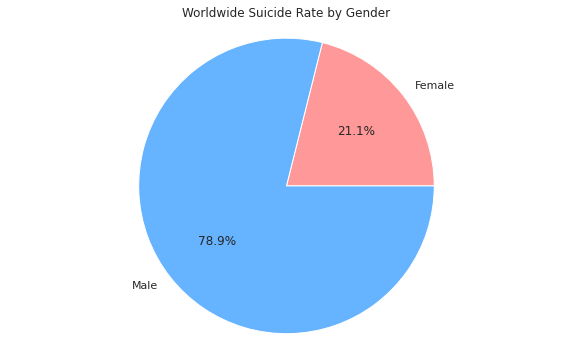

In [960]:
rate_by_gender = df[['Suicides/100k Pop', 'Gender']].groupby(['Gender']).sum()
rate_by_gender.rename(columns={'Gender':'Gender','Suicides/100k Pop': 'Count'})
pie, ax = plt.subplots(figsize=[10,6])
plt.pie(rate_by_gender['Suicides/100k Pop'],labels = ['Female', 'Male'], colors = ['#ff9999','#66b3ff'],autopct='%1.1f%%')
plt.title('Worldwide Suicide Rate by Gender')
plt.axis('equal')
plt.show()

From the pie-chart we can see that the suicide rate for males is overwhelmingly large compared to the female rate.

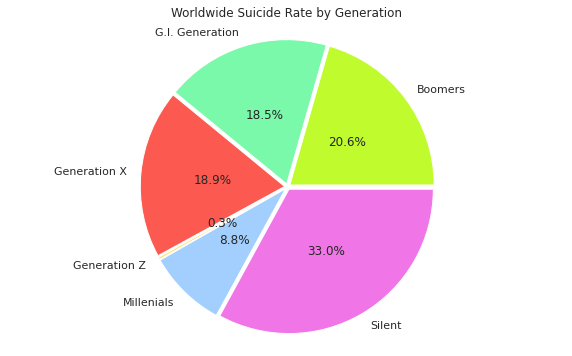

In [961]:
rate_by_generation = df[['Suicides/100k Pop', 'Generation']].groupby(['Generation']).sum()
rate_by_generation.rename(columns={'Generation':'Generation','Suicides/100k Pop': 'Count'})
rate_by_generation.head()

pie, ax = plt.subplots(figsize=[10,6])
labels = ['Boomers', 'G.I. Generation', 'Generation X','Generation Z', 'Millenials', 'Silent']
plt.pie(rate_by_generation['Suicides/100k Pop'], autopct="%.1f%%", explode=[0.02]*6, labels=labels, 
        pctdistance=0.5, colors =  ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e',  '#a2cffe', '#f075e6'])
plt.title('Worldwide Suicide Rate by Generation')
plt.axis('equal')
plt.show()

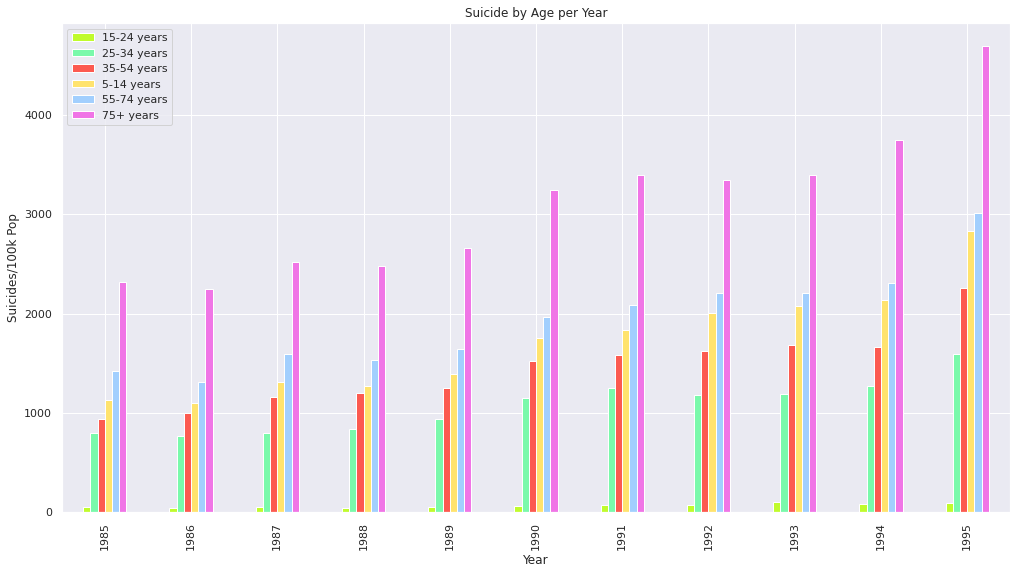

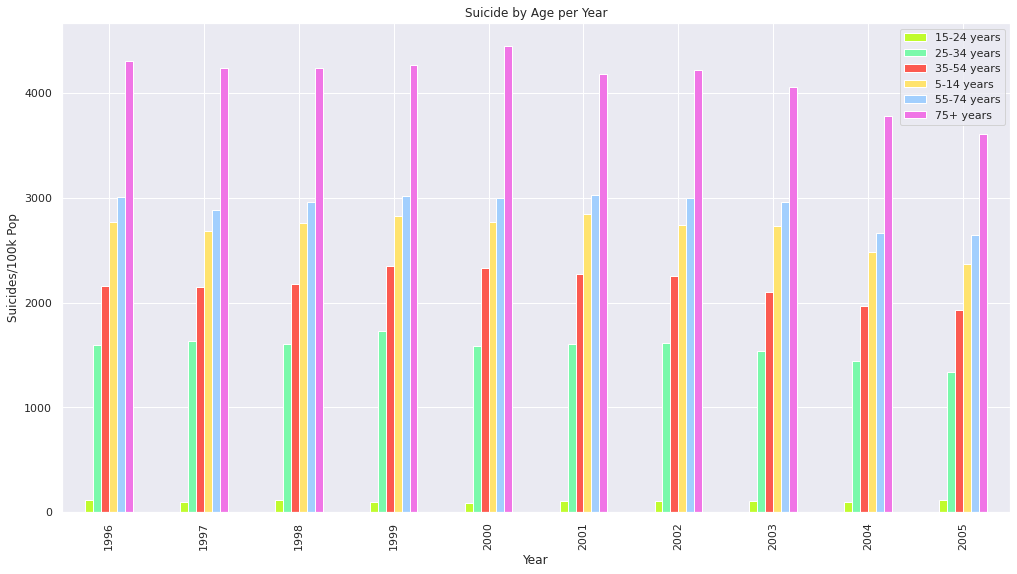

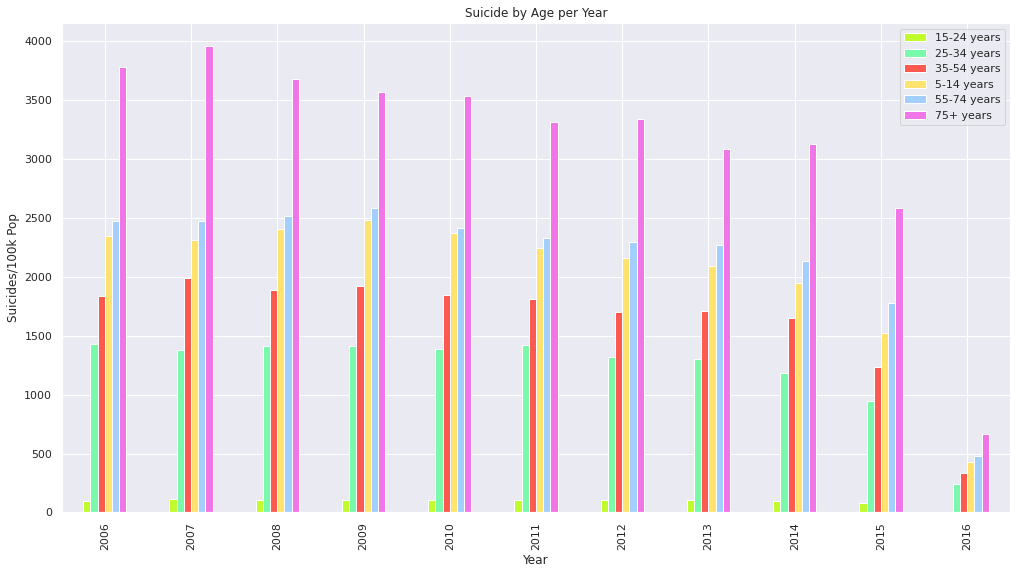

In [962]:
ay = pd.DataFrame(df[['Suicides/100k Pop', 'Year', 'Age', ]].groupby(['Year', 'Age']).sum())

third_df = len(ay) // 3
ay1 = ay.iloc[:third_df + 2]
ay2 = ay.iloc[third_df + 2:(2 * third_df - 2)]
ay3 = ay.iloc[(2 * third_df - 2):]

age_legend = ['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']

ay1.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
ay2.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
ay3.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],
                   title = "Suicide by Age per Year", ylabel = 'Suicides/100k Pop')
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);


As seen above, the order of the age-groups who commit suicide does not change through the years. This means those who are older are at more risk.

Text(0.5, 1.0, 'Worldwide Suicides per Year')

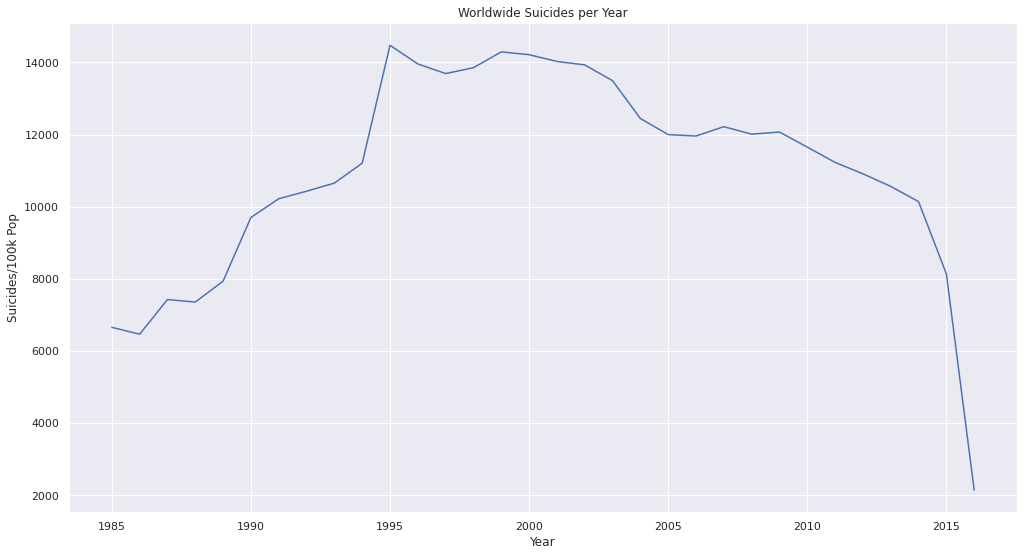

In [963]:
rate_by_year = df[['Suicides/100k Pop', 'Year']].groupby(['Year']).sum()
sns.lineplot(data=rate_by_year, x="Year", y="Suicides/100k Pop").set_title("Worldwide Suicides per Year")

**Continent**

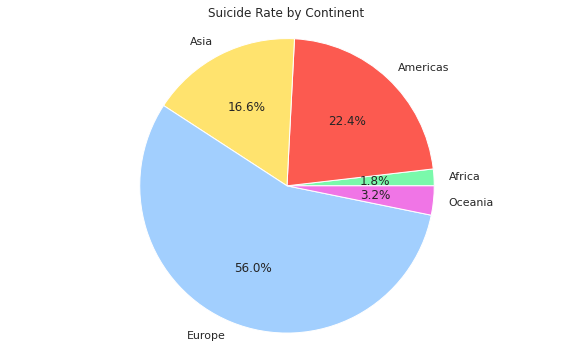

In [964]:
suicide_by_continent = df[['Suicides/100k Pop', 'Continent']].groupby(['Continent']).sum()

pie, ax = plt.subplots(figsize=[10,6])
plt.pie(suicide_by_continent['Suicides/100k Pop'],labels = ['Africa', 'Americas', 'Asia', 'Europe', 'Oceania'],
        colors = ['#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'],autopct='%1.1f%%')
plt.title('Suicide Rate by Continent')
plt.axis('equal')
plt.show()

Text(0, 0.5, 'Suicides/100k Pop')

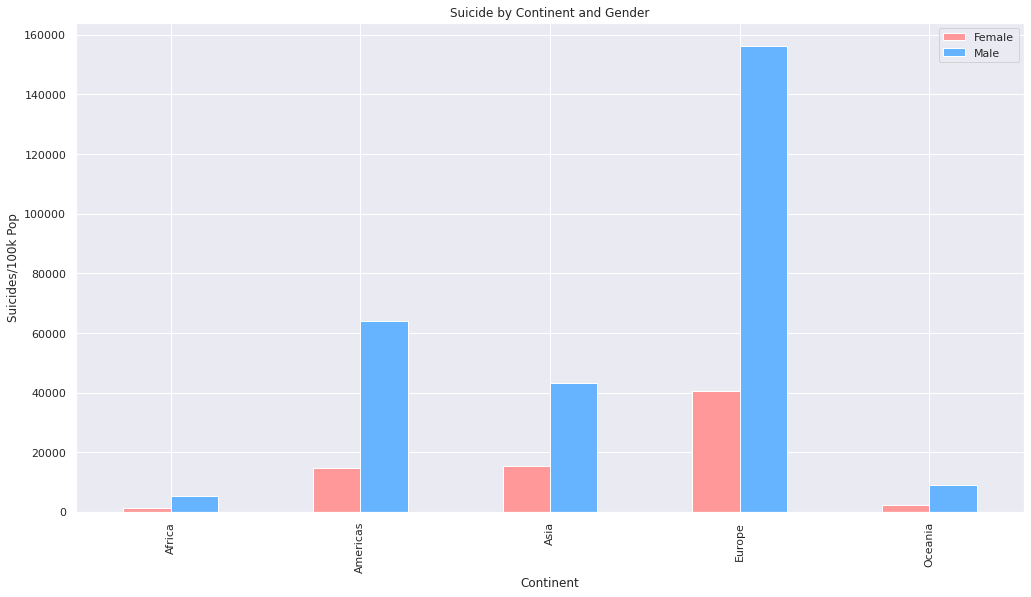

In [965]:
gender_continent = df[['Suicides/100k Pop', 'Continent', 'Gender']].groupby(['Continent', 'Gender']).sum()
gender_continent.unstack().plot(kind = 'bar', color = ['#ff9999','#66b3ff'], title = "Suicide by Continent and Gender")
plt.legend(["Female", "Male"]);
plt.xlabel('Continent')
plt.ylabel('Suicides/100k Pop')

Text(0, 0.5, 'Suicides/100k Pop')

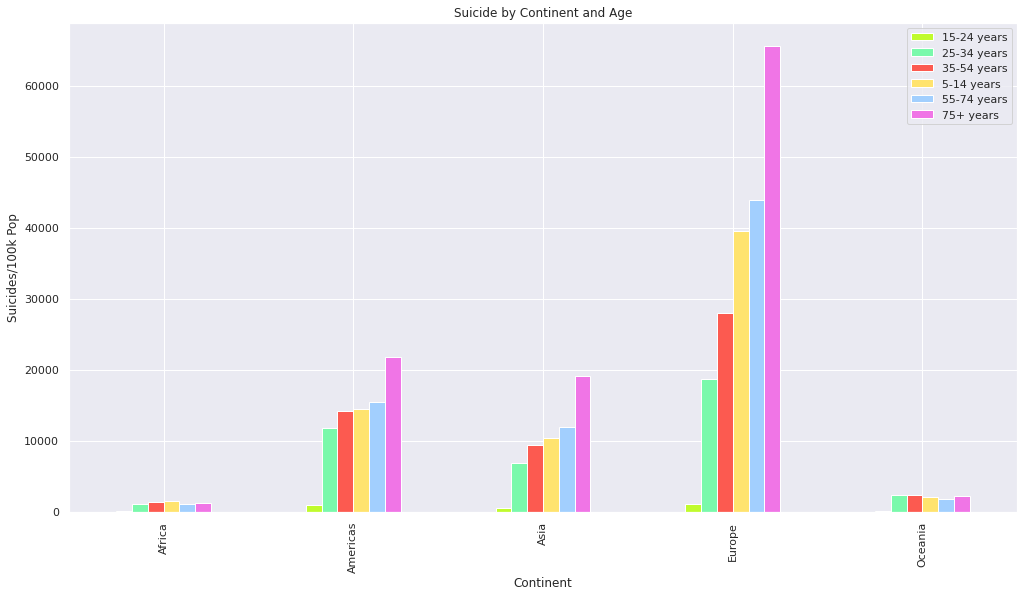

In [966]:
age_continent = df[['Suicides/100k Pop', 'Continent', 'Age']].groupby(['Continent', 'Age']).sum()
age_continent.unstack().plot(kind = 'bar', color = ['#c0fb2d', '#7af9ab', '#fc5a50','#ffe36e', '#a2cffe', '#f075e6'], 
                             title = "Suicide by Continent and Age")
plt.legend(['15-24 years', '25-34 years', '35-54 years', '5-14 years', '55-74 years', '75+ years']);
plt.xlabel('Continent')
plt.ylabel('Suicides/100k Pop')

**Countries**

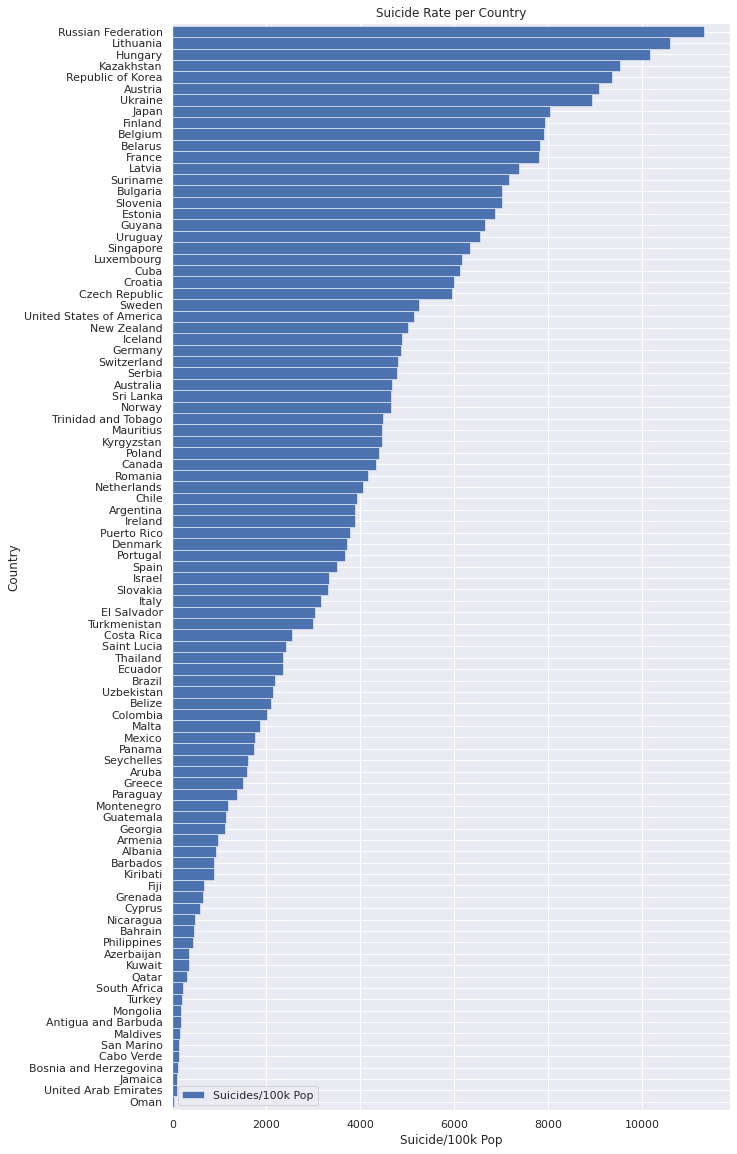

In [967]:
suicide_by_country = df[['Suicides/100k Pop', 'Country']].groupby(['Country']).sum().sort_values(by = 'Suicides/100k Pop', 
                                                                                                 ascending = True)
    
cm = plt.cm.get_cmap('RdYlBu')    
suicide_by_country.plot(kind = 'barh', title = 'Suicide Rate per Country',
                         width = 1, linewidth=0.5, figsize = [10, 20])

plt.xlabel("Suicide/100k Pop")
plt.ylabel("Country")
plt.show()

Text(0, 0.5, 'Suicides/100k Pop')

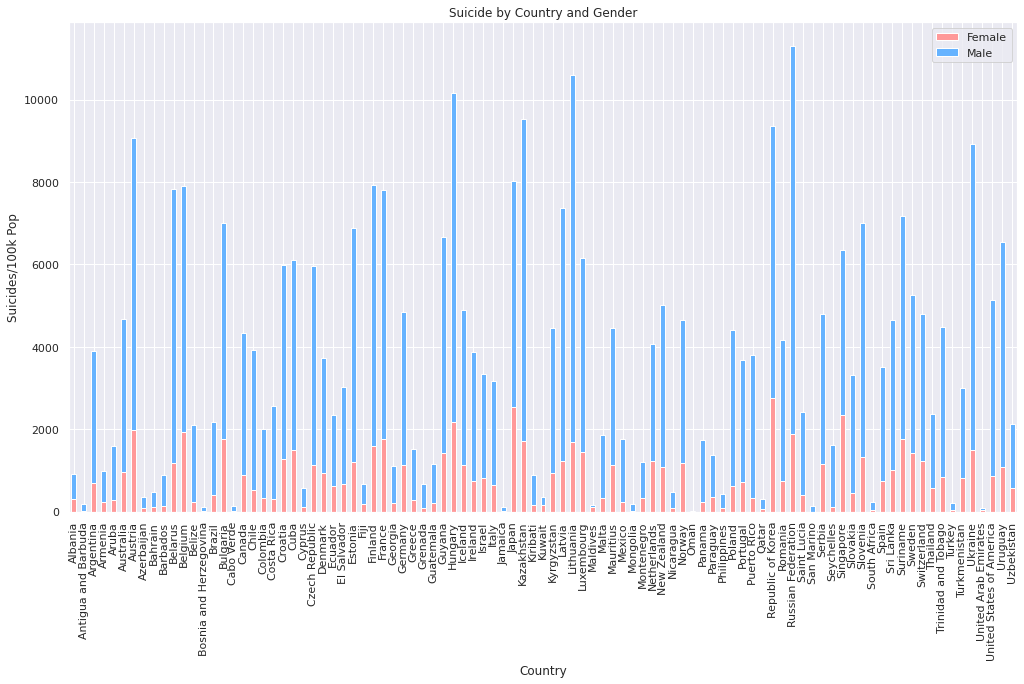

In [968]:
gender_country = df[['Suicides/100k Pop', 'Country', 'Gender']].groupby(['Country', 'Gender']).sum()
gender_country.unstack().plot(kind = 'bar', stacked=True, color = ['#ff9999','#66b3ff'],
                              title = "Suicide by Country and Gender")
plt.legend(["Female", "Male"]);
plt.xlabel('Country')
plt.ylabel('Suicides/100k Pop')


## Potential Data Science

## Conclusion